# 1. Install and Import Dependencies

In [1]:
!pip3 list

Package              Version
-------------------- -----------
anyio                3.6.2
appnope              0.1.3
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.8
attrs                22.1.0
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               5.0.1
cffi                 1.15.1
debugpy              1.6.3
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
executing            1.1.1
fastjsonschema       2.16.2
idna                 3.4
importlib-metadata   5.0.0
ipykernel            6.16.1
ipython              8.5.0
ipython-genutils     0.2.0
ipywidgets           8.0.2
jedi                 0.18.1
Jinja2               3.1.2
jsonschema           4.16.0
jupyter              1.0.0
jupyter_client       7.4.3
jupyter-console      6.4.4
jupyter_core         4.11.2
jupyter-server       1.21.0
jupyterlab-pygments  0.2.2
jupyterlab-widgets   3.0.3
MarkupSafe           2.1.1
matplotlib-inline    0.1.6
mistune      

In [2]:
# Installation for linux, check website to get mac installation
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.8/133.8 MB 13.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.5 MB/s eta 0:00:007.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 5.3 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 5.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Using cached certifi-2022.9.24-py3-none-any.whl (161 kB)
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
You should consider upgrading via the '/Users/jorgealves/projects/personal/pwm-ml-ai-playground/venv/bin/python -m pip

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14379, done.
remote: Total 14379 (delta 0), reused 0 (delta 0), pack-reused 14379
Receiving objects: 100% (14379/14379), 13.33 MiB | 8.04 MiB/s, done.
Resolving deltas: 100% (9950/9950), done.


In [4]:
!pip3 install -r yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 9.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 MB 14.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached PyYAML-6.0-cp39-cp39-macosx_10_9_x86_64.whl (197 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 13.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 13.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 14.0 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 KB 5.6 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 13.5 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 4.8 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 KB 4.4 MB/s eta 0:00:00
You should consider upgrading via the '/Users/jorgealves/projects/personal/pwm-ml-ai-playground/venv/bin/python -m pip install --upgrade pip' command.


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


# 2. Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/Users/jorgealves/projects/personal/pwm-ml-ai-playground/venv/lib/python3.9/site-packages/torch/hub.py:266: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/jorgealves/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-10-24 Python-3.9.12 torch-1.12.1 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [10]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [11]:
results = model(img)
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 294.4ms pre-process, 183.8ms inference, 2.9ms NMS per image at shape (1, 3, 448, 640)


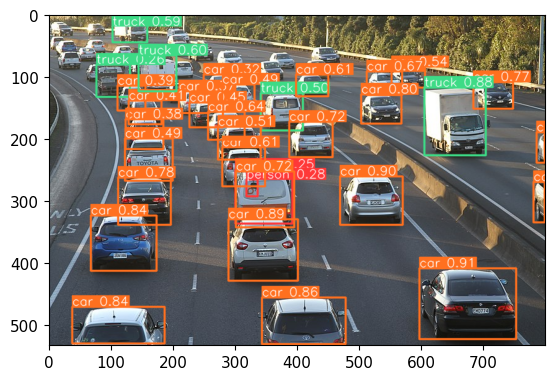

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# 4. Real Time Detections

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

2022-10-24 10:04:54.642 python[21922:90369] CMIOMS: EOSWebcamUtilityMain 
2022-10-24 10:04:54.643 python[21922:90369] CMIOMS: HardwarePlugIn_QueryInterface 
2022-10-24 10:04:54.643 python[21922:90369] CMIOMS: HardwarePlugIn_Release sRefCount now = 0
2022-10-24 10:04:54.643 python[21922:90369] CMIOMS: HardwarePlugIn_InitializeWithObjectID self=0x1601d3728
2022-10-24 10:04:54.643 python[21922:90369] CMIOMS: HardwarePlugIn_ObjectGetPropertyData Device(34) kCMIODevicePropertyDeviceUID self=0x1601d3728 data(id)=01000400
2022-10-24 10:04:54.644 python[21922:90369] CMIOMS: HardwarePlugIn_ObjectGetPropertyData Device(34) kCMIODevicePropertyTransportType self=0x1601d3728 data(int)=1651274862
2022-10-24 10:04:54.644 python[21922:90369] CMIOMS: HardwarePlugIn_ObjectSetPropertyData Device(34) kCMIOObjectPropertyListenerAdded self=0x1601d3728 data(int)=1684629094
2022-10-24 10:04:54.644 python[21922:90369] CMIOMS: Device unhandled setPropertyDataWithAddress for kCMIOObjectPropertyListenerAdded
2022

2022-10-24 10:04:59.682 python[21922:128032] [VIRTCAM.PLUGIN]: Server Connection Interrupted!
2022-10-24 10:04:59.682 python[21922:128082] [VIRTCAM.PLUGIN]: Error from service: <dictionary: 0x7ff85f437740> { count = 1, transaction: 0, voucher = 0x0, contents =
	"XPCErrorDescription" => <string: 0x7ff85f4378d8> { length = 18, contents = "Connection invalid" }
}
2022-10-24 10:04:59.683 python[21922:128032] [VIRTCAM.PLUGIN]: Error event from service: <dictionary: 0x7ff85f437740> { count = 1, transaction: 0, voucher = 0x0, contents =
	"XPCErrorDescription" => <string: 0x7ff85f4378d8> { length = 18, contents = "Connection invalid" }
}
2022-10-24 10:05:04.691 python[21922:127595] [VIRTCAM.PLUGIN]: Server Connection Interrupted!
2022-10-24 10:05:04.691 python[21922:128082] [VIRTCAM.PLUGIN]: Error from service: <dictionary: 0x7ff85f437740> { count = 1, transaction: 0, voucher = 0x0, contents =
	"XPCErrorDescription" => <string: 0x7ff85f4378d8> { length = 18, contents = "Connection invalid" }
}

In [ ]:
cap.release()

# 5. Train from scratch

In [9]:
import uuid   # Unique identifier
import os
import time

In [ ]:
if not os.path.exists('data'):
    os.mkdir('data')
if not os.path.exists('data/labels'):
    os.mkdir('data/labels')
if not os.path.exists('data/images'):
    os.mkdir('data/images')
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['andre']
number_imgs = 10

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
# commands for linux (check labelImg website for instructions for mac)
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
# First clear /labelimg/data/predefined_classes.txt and keep it blank
# To initiate the labemImg up run in the console -> python labelImg/labelImg.py
# select "open dir" and choose the data/images folder
# selct "change save dir" and choose the data/labels folder
# change saving model to yolo (bellow save button)
# then save the annotation and do the same for the next images

# at the end go to the labels

In [ ]:
!python yolov5/train.py --img 320 --batch 16 --epochs 500 --data yolov5/dataset.yml --weights yolov5s.pt --workers 2

# 6. Load Custom Model

In [18]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/andreramos/.cache/torch/hub/master.zip
requirements: YOLOv5 requirement "seaborn>=0.11.0" not found, attempting AutoUpdate...

requirements: 1 package updated per /home/andreramos/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-10-21 Python-3.8.10 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [19]:
img = os.path.join('data', 'images', 'andre.6cce3fd2-5159-11ed-9477-0fd44767cf9f.jpg')

In [20]:
results = model(img)

In [21]:
results.print()

image 1/1: 480x640 1 andre
Speed: 4.1ms pre-process, 78.1ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)


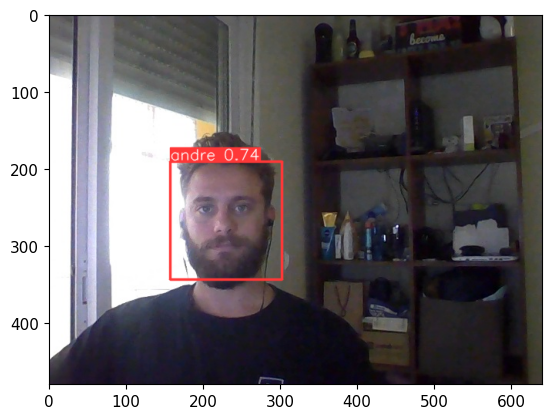

In [22]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [25]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    image = frame.copy()
    
    for prediction in results.pred[0].numpy():
        if prediction[4] >= 0.1:
            box = [prediction[0], prediction[1], prediction[2], prediction[3]]
            region = image[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
            # blur the region
            blured_img = cv2.blur(region, (20, 20))
            # replace the blured region in the image
            image[int(box[1]):int(box[3]), int(box[0]):int(box[2])] = blured_img
    # Make detections 
    
    
    cv2.imshow('YOLO', np.squeeze(image))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[     76.192      192.03      237.01      360.82     0.45871           0]
[     75.976      191.29      236.43      359.61     0.44074           0]
[     75.213      191.85      236.22      362.18     0.46175           0]
[     75.128      190.73       236.6      360.78     0.46291           0]
[      74.95      191.27      237.84      361.02     0.45923           0]
[     75.602      190.51      237.01      360.73     0.45797           0]
[     75.399      191.35      235.13      361.25     0.46202           0]
[     74.362      192.92      237.63       362.9     0.49643           0]
[      70.91      190.71      239.89      362.44     0.45151           0]
[     68.638      189.64      238.56      355.09     0.30448           0]
[     69.405       188.1      235.51      362.06     0.39487           0]
[     67.015      187.46      234.01      358.12     0.37382           0]
[     69.514      191.05      235.34       357.2     0.29115           0]
[     72.318       188.4      233.56  

[     61.277      192.33      228.02      366.76     0.31892           0]
[     61.591      194.14      225.83      365.63     0.38889           0]
[     72.269      190.26      218.17      361.84     0.36672           0]
[     72.199      193.08      218.52      359.58     0.39028           0]
[     70.015      192.25      219.76         362     0.37802           0]
[     61.462      193.05      227.63      366.95     0.36591           0]
[     72.837      192.04      218.46      360.15     0.42216           0]
[     60.162      190.47      227.65      363.76     0.36118           0]
[     60.645      192.84       228.3      366.01     0.31928           0]
[     60.061      191.22      225.94      363.89     0.37467           0]
[     60.329       189.6      225.92      362.23     0.35651           0]
[     60.087      190.87       226.1      361.66     0.38538           0]
[     59.389      192.17      226.69      361.41     0.35806           0]
[     59.334      191.53      225.72  

[     22.094      212.28      181.02      365.75     0.44343           0]
[     24.949       202.1      180.88      370.78     0.41093           0]
[     24.456      211.74      177.79      361.87     0.42047           0]
[     25.134      212.72      179.52      359.96      0.4083           0]
[     27.982      200.96      181.61      367.46     0.41585           0]
[     26.916      206.13       175.5       346.9     0.45042           0]
[     25.427       205.4       175.8       347.2      0.4386           0]
[     25.814      207.05      175.64      347.87     0.40987           0]
[     27.877      208.66      180.78      363.89     0.42061           0]
[     25.898       205.5      176.42      350.15     0.44329           0]
[     25.046      204.61      176.07      349.75     0.45949           0]
[     25.941      203.42      174.97      351.07     0.44987           0]
[     24.273      198.06      174.34      354.24     0.46536           0]
[     24.272      201.77      176.24  

[     40.244      208.62      189.14         375      0.3114           0]
[     28.073      211.54      193.24      386.59     0.36069           0]
[     30.151      212.89      192.06      385.74     0.32626           0]
[     30.992      216.11      166.98       367.6     0.37092           0]
[     23.735      217.53      184.91      382.54     0.27274           0]
[     30.092      217.38      170.84       366.9     0.30192           0]
[     29.729      215.62      170.29      368.64     0.27611           0]
[     29.923      217.63      168.92      368.13     0.29322           0]
[     30.476      214.48      169.11      369.55     0.37465           0]
[     25.323       213.7      188.27      380.33      0.3298           0]
[     29.477       216.9      170.77      369.49      0.3304           0]
[     25.123      214.28      189.12      382.82     0.32015           0]
[     24.847      214.22      190.72      385.21     0.33598           0]
[     28.903      214.14      171.88  

[     53.493       199.2      204.74      369.42     0.41441           0]
[     55.452      194.87       203.2      362.61     0.42299           0]
[     51.674       207.1      209.59      353.47      0.4803           0]
[     55.595      197.19      198.54      356.78     0.52832           0]
[      58.95       195.6      195.09      349.17     0.60407           0]
[     57.228      205.42      209.08      348.82     0.62573           0]
[      67.43      191.61      209.02      344.47     0.69633           0]
[     73.539       196.8      217.86      338.24     0.57548           0]
[     76.451      200.74       219.9      336.08     0.60401           0]
[     80.117      195.59      221.68      341.24     0.72333           0]
[     82.776      193.65      221.96      347.25     0.65598           0]
[     84.095      189.22      222.52      351.29     0.69641           0]
[     621.91      23.492      638.32      112.93     0.37488           0]
[      82.56      187.92      221.51  

[     73.128      194.77      221.14      362.49     0.47825           0]
[     70.685      195.37      221.28      361.49     0.42687           0]
[     71.395      195.27      220.29      360.18     0.43755           0]
[     72.859      194.61      220.17      361.19     0.39213           0]
[     72.365      199.92      221.97      354.44      0.4888           0]
[     68.725      202.69      228.95      364.04     0.38754           0]
[     71.804      200.63       222.3      355.83     0.40071           0]
[     72.752      197.18      218.84      361.28     0.41475           0]
[     74.622       195.9      220.33      359.81     0.47529           0]
[     74.292      194.99         218      360.78     0.39523           0]
[     73.789      202.95       228.5      367.05     0.43068           0]
[     77.517      201.57      229.32      364.37     0.47007           0]
[     77.893      200.67      230.52      366.82     0.39558           0]
[     75.954      199.47      232.03  

[       54.3      210.46      190.77      352.06     0.69762           0]
[     595.83           0      638.48      112.06     0.57673           0]
[     55.982      209.12      191.06      352.91     0.71593           0]
[      599.4      11.122      636.72      133.27     0.40428           0]
[     54.976      208.19      190.18      355.01     0.75476           0]
[      54.46      209.18       191.4      352.65      0.7311           0]
[     56.227      208.26      191.04      353.64       0.737           0]
[     56.015      209.72      191.35      352.67     0.77105           0]
[     55.838      211.02      190.46      349.88     0.74973           0]
[     56.871      208.42      190.85      351.47     0.74921           0]
[     56.593         209      191.86       352.2     0.74983           0]
[     56.538      208.83      192.26      352.12     0.74421           0]
[     57.223      208.43      192.08      352.34     0.73882           0]
[     56.352      208.36      191.35  

[     63.914      209.97      194.53      354.65     0.72248           0]
[     64.543       208.3      194.96      353.98     0.73199           0]
[     66.918      209.16      195.15      354.66     0.74939           0]
[     66.251      209.02      195.35      354.33     0.74024           0]
[     65.227      209.15      193.73      352.78     0.72747           0]
[     55.985      206.45      193.22      355.38     0.71087           0]
[     54.005      207.84       192.7      350.68     0.67495           0]
[     61.818      206.81      188.78      347.58     0.57685           0]
[     53.245       211.4      193.35      351.32      0.5803           0]
[     62.597      210.72      195.03      353.25     0.65674           0]
[     64.664      207.94      193.57      352.31     0.74271           0]
[     64.895      209.62      192.88       352.6     0.75197           0]
[     63.597      209.73      194.17      352.86      0.7028           0]
[     65.989      210.28      192.81  

[      70.38      213.38      208.98      348.25     0.71788           0]
[     63.776      219.23      205.75      341.73     0.73533           0]
[     66.563      222.08      200.17      337.24     0.33264           0]
[     88.756      222.48      232.76      341.75     0.62204           0]
[     90.793      219.16      235.67      347.84     0.66106           0]
[     88.538      216.29      233.67      347.83     0.54459           0]
[     87.991      209.26      213.51      355.26     0.70597           0]
[     76.808      209.98      209.81      357.34     0.65748           0]
[     60.612       215.7      206.77       349.9     0.69218           0]
[     56.773      214.28      205.78      349.69     0.72735           0]
[     58.466      216.11      205.92      350.59     0.72759           0]
[     58.756      215.11      209.47      351.49     0.67734           0]
[     79.567      212.39      210.26      354.57     0.62335           0]
[     88.958      212.74      232.26  

[     43.339      217.56      165.28      355.25     0.78356           0]
[     38.064      218.14       175.4      353.05     0.68658           0]
[     40.033      215.32      176.58      355.99     0.64946           0]
[      40.96      216.47      176.74      353.24     0.63548           0]
[     44.526      215.69      177.31      350.64     0.65935           0]
[      45.41      216.74      175.88      351.61      0.6929           0]
[     44.947      216.95      175.24      352.41     0.63631           0]
[      38.84      217.03      176.27      353.36     0.66572           0]
[     38.322      216.59      176.15      354.22     0.67105           0]
[     38.773      214.81      176.24      353.58     0.64973           0]
[     39.935      212.85      176.79      357.86     0.58058           0]
[     45.132      219.47      180.57      360.32     0.58728           0]
[     43.454      219.51       180.3      360.43     0.64023           0]
[     50.246      220.92      168.82  

[      50.99      208.14      192.97      358.05     0.66611           0]
[     52.197      208.86      192.27      355.02     0.73536           0]
[      54.06      210.11      191.71      356.44     0.76232           0]
[      55.75      209.44      190.17      356.11     0.78508           0]
[     55.153      210.38      189.68      356.52     0.76843           0]
[     54.347      211.33      190.71      357.24     0.75286           0]
[     55.403      209.84      189.06      357.78      0.7673           0]
[     54.982      209.35      189.96      358.81     0.74169           0]
[     56.344      209.48      189.52      357.08     0.76176           0]
[     55.758      209.43      190.81      358.22     0.72873           0]
[     56.344      209.42         190      357.68      0.7436           0]
[     57.099      210.39      189.86      355.22     0.76554           0]
[     55.884       210.9       190.5      358.19     0.74986           0]
[      57.01      210.22      189.61  

[     59.269      222.61      186.13      344.32     0.69917           0]
[     59.041       222.7      187.59      341.71     0.72177           0]
[     61.577      214.17       188.5         349     0.72592           0]
[     592.03      24.233      636.09      148.66     0.26564           0]
[     60.715      224.47      185.64      340.35     0.70526           0]
[     589.73      14.635      635.95       134.9     0.51316           0]
[     60.092      222.74       186.3      341.34     0.70856           0]
[     60.881      221.99      187.56      342.82     0.69073           0]
[      60.21      222.12      187.65       345.8     0.72938           0]
[     60.082      222.62      186.65      341.77     0.71953           0]
[      59.23      222.14      188.05      341.07     0.68593           0]
[     588.56      42.199      639.36      125.57     0.38197           0]
[     60.093      222.69      187.68         344     0.64444           0]
[     59.469      220.95      187.85  

[     71.221      212.82      197.53      354.47     0.81383           0]
[     70.579      213.02      196.56      354.46     0.82413           0]
[     70.639      212.34      197.07      354.03      0.8142           0]
[      593.3      1.0274      636.47      116.67     0.54036           0]
[     71.466      211.65      198.01      351.31     0.81151           0]
[     594.21      17.303      636.93      124.26     0.53386           0]
[     72.693       211.4      197.79       351.3     0.83355           0]
[      592.1      1.3477      636.56      114.32     0.68386           0]
[     71.146      210.55      198.79      350.72     0.82493           0]
[     591.34      15.623      638.42         123     0.65513           0]
[     70.645      210.31      198.38      353.08     0.77534           0]
[     590.97      14.661      636.26      128.29     0.38232           0]
[     70.564       211.6      196.64      354.87     0.77085           0]
[     591.49      3.5969      636.23  

[     65.099      212.17      195.95      357.75     0.72582           0]
[     593.01      2.0717      636.11      113.46     0.64599           0]
[     66.115      213.17      195.39      357.85     0.72485           0]
[     594.77      14.163      637.94         128     0.54229           0]
[     64.903      212.85      195.49      358.13     0.75024           0]
[     594.88      11.723      637.47      128.49     0.43545           0]
[     591.46     0.52333      636.25      113.54     0.73485           0]
[      64.72      213.52      194.18      357.61     0.71326           0]
[     59.435      210.85       191.3      356.18     0.72064           0]
[     586.35      1.2228      637.83      115.45     0.49271           0]
[     593.24       2.895      635.95       112.4     0.77276           0]
[     60.788      211.73      192.62      354.65      0.7312           0]
[     63.784      212.47      193.72      356.15     0.74628           0]
[     592.82      2.0561      635.62  

[     73.256      212.81      197.54      356.31     0.81852           0]
[     584.64      16.342      637.41      128.26     0.52455           0]
[      71.52      213.17      197.17      355.17     0.81351           0]
[     584.05      9.9831       638.3      130.99     0.34009           0]
[     70.727       212.6      197.12       354.5     0.82071           0]
[     581.29      10.974      638.29      135.44     0.29639           0]
[     71.066      213.08      196.87      355.86     0.80863           0]
[     71.678      213.14      196.66      354.97      0.8136           0]
[     580.66      10.962      638.12      128.76     0.42206           0]
[     70.896      212.54      196.81      355.67      0.7974           0]
[      71.41      212.84      197.09      357.37     0.79659           0]
[     71.787      213.51      197.31      357.18      0.8149           0]
[     70.474      212.35      198.22      357.55      0.7947           0]
[      582.7      13.686      638.91  

[     67.302      212.58      197.33      358.84     0.70783           0]
[     67.875      212.49         197      359.33     0.73478           0]
[     66.813      212.74      197.59      359.14      0.7176           0]
[     60.755       218.4      203.13      348.61     0.71834           0]
[     66.556      212.46      197.01      357.33     0.71684           0]
[     65.678      212.49      197.26       356.8     0.71448           0]
[     587.95      4.0883      636.44      115.54     0.32328           0]
[     65.532      213.22      196.26      358.17     0.74058           0]
[     586.77      3.1034      637.21      114.08       0.296           0]
[     63.812      212.85      197.33       358.2     0.69947           0]
[     585.26       14.21      637.64      126.31     0.32452           0]
[     65.422      212.37       195.9       358.1     0.69736           0]
[     64.336      211.08      197.43      357.24     0.72793           0]
[     583.16      14.589      637.91  

[     56.496      209.97      192.44      354.53     0.75836           0]
[     57.738      210.96      191.05      353.97     0.77783           0]
[     58.675      210.96      190.57       355.1     0.76915           0]
[     64.736      213.06       193.9      355.18     0.74345           0]
[      66.09      212.48      195.45      355.09     0.76452           0]
[     605.62      158.63      635.42      273.91       0.275           0]
[     65.967      211.84       196.1      354.91     0.77934           0]
[     609.45      154.21      638.36      282.54     0.27791           0]
[     66.407      212.35       195.9      355.42     0.77986           0]
[     612.98      152.44      638.35      280.54     0.37435           0]
[     66.589      211.18       195.9       355.9     0.78219           0]
[     614.06      150.93      637.96      279.53     0.33136           0]
[     65.547      211.84      196.39       355.9     0.77417           0]
[     615.06      171.11      637.21  

[      20.17      224.81       148.6      362.37     0.63616           0]
[     25.781       231.2      157.28      356.05     0.56832           0]
[     27.007      228.04      156.65      358.68     0.56082           0]
[     20.508      232.38      154.51       357.1     0.43458           0]
[     25.047      221.65      149.23       362.1      0.6768           0]
[     28.151      220.43      149.21      353.15     0.69048           0]
[     24.617      221.79      148.14      361.65     0.68142           0]
[     23.618      222.15      147.38      361.91     0.63168           0]
[     21.196      222.71      146.85      360.82     0.61902           0]
[     18.669      223.95      147.66      363.07     0.57811           0]
[     6.8116      223.67      154.72      366.46     0.47962           0]
[     3.5368      213.41      153.96      372.86     0.34382           0]
[     3.7592      212.52      154.46      374.15     0.41773           0]
[     4.9346       214.9      154.07  

[     54.753      223.85      189.84      347.28     0.52989           0]
[     71.656      212.51      206.15      371.44     0.61485           0]
[     82.948      213.48      221.17      352.51     0.58252           0]
[      87.37      208.61      236.25      351.02     0.48906           0]
[     83.181      198.91      225.96      349.69     0.42828           0]
[     68.484      180.25       223.9      346.17     0.43138           0]
[     62.488      187.28      233.44       364.2     0.35673           0]
[     57.654      184.49      230.38      365.66     0.26386           0]
[     53.123      185.73      231.65       366.8     0.26687           0]
[     37.715       212.1      209.85      386.51     0.26181           0]
[     36.802       211.9      210.67      389.24     0.25344           0]
[     35.483       212.3      211.95      389.01     0.26821           0]
[     36.784      209.98      211.51      387.31     0.28257           0]
[     39.247      208.86      209.69  

[     68.216      239.93      204.19      349.16     0.57254           0]
[     69.088      242.23      203.47      347.11     0.58224           0]
[      69.51      241.17       202.8      348.85     0.56629           0]
[     68.701      241.47      203.17      346.27      0.6257           0]
[     544.58      3.4416         640      111.82     0.28494           0]
[      68.24      241.35      202.61      346.33     0.61187           0]
[     68.289      240.85      203.66      345.97     0.56676           0]
[     70.898      240.89      201.67      348.96     0.51285           0]
[     69.204      239.98      201.14      349.03     0.46207           0]
[     67.478      239.42      204.85      347.23     0.51247           0]
[     66.498      241.07      206.45       345.3     0.60265           0]
[     76.644      228.51      193.53      354.23     0.55026           0]
[     67.907      241.37      203.49      345.02     0.58876           0]
[     67.909      240.99      203.86  

[     145.39           0      261.63       122.1      0.3669           0]
[     182.51      5.6118      277.29      86.261     0.42313           0]
[          0      272.14      42.471      329.11     0.25968           0]
[     71.119           0      191.42      124.93     0.49651           0]
[     75.669           0      185.37      130.62     0.26178           0]
[          0      299.08      48.874      380.48     0.31198           0]
[          0      287.93      68.342      391.37     0.48515           0]
[     190.82      6.9326      314.57      142.74     0.27848           0]
[     590.05           0         640      28.744      0.2762           0]
[     589.08           0         640      26.496     0.28886           0]
[     598.92      260.16      637.29      361.97     0.25874           0]
[     582.47      257.32      638.45      368.37     0.34191           0]
[     589.75           0         640      28.167     0.25814           0]
[     588.17           0         640  